In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
# libraries for web scraping
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

import warnings
warnings.filterwarnings('ignore', '.*do not.*', )

In [2]:
page=requests.get("https://www.iplt20.com/stats/2021/most-runs")
page

<Response [200]>

In [3]:
page.text

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n    <meta name="twitter:title" content="IPLT20.com - Indian Premier League Official Website"/>\n<meta name="keywords" content="ipl, iplt20, indian premier league, ipl cricket, ipl match, ipl live, ipl score, ipl scorecard, ipl stats, ipl schedule, ipl results, ipl points table, ipl teams, ipl videos, ipl teams, ipl news, BCCI IPL"/>\n<meta property="og:type" content="website"/>\n<meta name="description" content="Visit IPLT20.com the official IPLT20 website for minute-to-minute LIVE updates."/>\n<meta name="twitter:description" content="Visit IPLT20.com the official IPLT20 website for minute-to-minute LIVE updates."/>\n<meta property="og:title" content="IPLT20.com - Indian Premier League Official Website"/>\n<title>IPLT20.com - Indian Premier League Official Website</title>\n<meta property="og:description" content="Visit IPLT20.com the official IPLT20 website for minute-to-minute LIVE updates."/>\n\n\n    <meta charset="UTF-8">\n    <meta na

In [4]:
soup=BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="IPLT20.com - Indian Premier League Official Website" name="twitter:title"/>
<meta content="ipl, iplt20, indian premier league, ipl cricket, ipl match, ipl live, ipl score, ipl scorecard, ipl stats, ipl schedule, ipl results, ipl points table, ipl teams, ipl videos, ipl teams, ipl news, BCCI IPL" name="keywords"/>
<meta content="website" property="og:type"/>
<meta content="Visit IPLT20.com the official IPLT20 website for minute-to-minute LIVE updates." name="description"/>
<meta content="Visit IPLT20.com the official IPLT20 website for minute-to-minute LIVE updates." name="twitter:description"/>
<meta content="IPLT20.com - Indian Premier League Official Website" property="og:title"/>
<title>IPLT20.com - Indian Premier League Official Website</title>
<meta content="Visit IPLT20.com the official IPLT20 website for minute-to-minute LIVE updates." property="og:description"/>
<meta charset="utf-8"/>
<meta content="width=device-width, ini

In [5]:
Name=[]
matches=[]
innings=[]
notouts=[]
runs=[]
hs=[]
Avge=[]
bf=[]
sr=[]
f=[]
h=[]
fours=[]
sixes=[]

season = []
for year in range(2008,2021):
    url = "https://www.iplt20.com/stats/{}/most-runs".format(year)
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
    #name
    
    names=soup.findAll('div',class_='top-players__player-name')
    for val in names:
        Name.append(val.text)
        
    Matches=soup.findAll('td',class_='top-players__m')
    for i in Matches:
        matches.append(i.text)
    Innings=soup.findAll('td',class_='top-players__inns')
    for i in Innings:
        innings.append(i.text)
    Notouts=soup.findAll('td',class_='top-players__no')
    for i in Notouts:
        notouts.append(i.text)
    Runs=soup.findAll('td',class_='top-players__r')
    for i in Runs:
        runs.append(i.text)
    Highest_score=soup.findAll('td',class_='top-players__hs')
    for i in Highest_score:
        hs.append(i.text)
    Average=soup.findAll('td',class_='top-players__a')
    for i in Average:
        Avge.append(i.text)
    BF=soup.findAll('td',class_='top-players__b')
    for i in BF:
        bf.append(i.text)
    SR=soup.findAll('td',class_='top-players__sr')
    for i in SR:
        sr.append(i.text)
    F=soup.findAll('td',class_='top-players__50s')
    for i in F:
        f.append(i.text)
    H=soup.findAll('td',class_='top-players__100s')
    for i in H:
        h.append(i.text)
    Fours=soup.findAll('td',class_='top-players__4s')
    for i in Fours:
        fours.append(i.text)
    Sixes=soup.findAll('td',class_='top-players__6s')
    for i in Sixes:
        sixes.append(i.text)
        season.append(year)
        

In [6]:
len(Name)

1837

In [7]:
len(matches)

1837

In [8]:
len(Avge)

1837

In [9]:
len(season)

1837

In [10]:
df=pd.DataFrame({
    'names':Name,
    'matches':matches,
    'innings':innings,
    'notouts':notouts,
    'runs':runs,
    'balls':bf,
    'high_score':hs,
    'avg':Avge,
    'strike_rate':sr,
    'fours':fours,
    'sixes':sixes,
    'fiftys':f,
    'hundreds':h,
    'season':season
})

In [11]:
df

,names,matches,innings,notouts,runs,balls,high_score,avg,strike_rate,fours,sixes,fiftys,hundreds,season
0,\n\n Shaun\n ...,\n 11\n,\n 11\n,\n 2\n,\n 616\n,\n 441\n,\n 115\n,\n 68.44\n,\n 139.68\n,\n 59\n,\n 26\n,\n 5\n,\n 1\n,2008
1,\n\n Gautam\n ...,\n 14\n,\n 14\n,\n 1\n,\n 534\n,\n 379\n,\n 86\n,\n 41.07\n,\n 140.89\n,\n 68\n,\n 8\n,\n 5\n,\n 0\n,2008
2,\n\n Sanath\n ...,\n 14\n,\n 14\n,\n 2\n,\n 518\n,\n 309\n,\n 114*\n,\n 43.16\n,\n 167.63\n,\n 58\n,\n 31\n,\n 2\n,\n 1\n,2008
3,\n\n Shane\n ...,\n 15\n,\n 15\n,\n 5\n,\n 472\n,\n 311\n,\n 76*\n,\n 47.20\n,\n 151.76\n,\n 47\n,\n 19\n,\n 4\n,\n 0\n,2008
4,\n\n Graeme\n ...,\n 11\n,\n 11\n,\n 2\n,\n 441\n,\n 362\n,\n 91\n,\n 49.00\n,\n 121.82\n,\n 54\n,\n 8\n,\n 3\n,\n 0\n,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,\n\n Khaleel\n ...,\n 7\n,\n 1\n,\n 0\n,\n 0\n,\n 2\n,\n 0*\n,\n 0.00\n,\n 0.00\n,\n 0\n,\n 0\n,\n 0\n,\n 0\n,2020
1833,\n\n Arshdeep\n ...,\n 8\n,\n 1\n,\n 0\n,\n 0\n,\n 3\n,\n 0*\n,\n 0.00\n,\n 0.00\n,\n 0\n,\n 0\n,\n 0\n,\n 0\n,2020
1834,\n\n Daniel\n ...,\n 3\n,\n 1\n,\n 0\n,\n 0\n,\n 2\n,\n 0*\n,\n 0.00\n,\n 0.00\n,\n 0\n,\n 0\n,\n 0\n,\n 0\n,2020
1835,\n\n Shreevats\n ...,\n 2\n,\n 2\n,\n 0\n,\n 0\n,\n 4\n,\n 0*\n,\n 0.00\n,\n 0.00\n,\n 0\n,\n 0\n,\n 0\n,\n 0\n,2020


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   names        1837 non-null   object
 1   matches      1837 non-null   object
 2   innings      1837 non-null   object
 3   notouts      1837 non-null   object
 4   runs         1837 non-null   object
 5   balls        1837 non-null   object
 6   high_score   1837 non-null   object
 7   avg          1837 non-null   object
 8   strike_rate  1837 non-null   object
 9   fours        1837 non-null   object
 10  sixes        1837 non-null   object
 11  fiftys       1837 non-null   object
 12  hundreds     1837 non-null   object
 13  season       1837 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 201.0+ KB


In [13]:
df.to_csv('scraping.csv')

In [14]:
df_ipl = pd.read_csv('scraping.csv')

### Matches

In [15]:
df_ipl.strike_rate

0       139.68
1       140.89
2       167.63
3       151.76
4       121.82
         ...  
1832      0.00
1833      0.00
1834      0.00
1835      0.00
1836      0.00
Name: strike_rate, Length: 1837, dtype: float64

In [16]:
df_ipl.matches.value_counts()
    

14    201
16    133
13    126
4     122
3     120
2     116
5     114
1     108
6     104
12     97
7      95
11     94
10     89
8      87
15     83
9      81
17     48
18     10
19      9
Name: matches, dtype: int64

In [17]:
df_ipl['matches'].isnull().sum()

0

In [18]:
df_ipl['matches']

0       11
1       14
2       14
3       15
4       11
        ..
1832     7
1833     8
1834     3
1835     2
1836    15
Name: matches, Length: 1837, dtype: int64

### Names

In [19]:
df_ipl['names'] = df_ipl['names'].apply(lambda x: x.replace('\n','').strip().replace('                           ',''))
df_ipl['names']

0             Shaun Marsh
1          Gautam Gambhir
2       Sanath Jayasuriya
3            Shane Watson
4            Graeme Smith
              ...        
1832        Khaleel Ahmed
1833       Arshdeep Singh
1834          Daniel Sams
1835    Shreevats Goswami
1836          Trent Boult
Name: names, Length: 1837, dtype: object

In [20]:
df_ipl['names'].value_counts()

Virat Kohli                         13
Wriddhiman Saha                     13
Shane Watson                        12
Yusuf Pathan                        12
Piyush Chawla                       12
                                    ..
Jeevan Mendis                        1
Tushar Deshpande                     1
LPC                        Silva     1
Chetanya Nanda                       1
Sheldon Jackson                      1
Name: names, Length: 623, dtype: int64

In [21]:
df_ipl['names'].isnull().sum()

0

In [22]:
df_ipl['names']

0             Shaun Marsh
1          Gautam Gambhir
2       Sanath Jayasuriya
3            Shane Watson
4            Graeme Smith
              ...        
1832        Khaleel Ahmed
1833       Arshdeep Singh
1834          Daniel Sams
1835    Shreevats Goswami
1836          Trent Boult
Name: names, Length: 1837, dtype: object

# innings

In [23]:
df_ipl['innings']

0       11
1       14
2       14
3       15
4       11
        ..
1832     1
1833     1
1834     1
1835     2
1836     1
Name: innings, Length: 1837, dtype: int64

In [24]:
df_ipl['innings'].value_counts()

1     260
2     240
3     190
4     149
5     109
6     102
14    101
13     99
7      96
8      77
12     74
11     74
9      69
16     65
10     63
15     44
17     20
18      3
19      2
Name: innings, dtype: int64

In [25]:
df_ipl['innings'].isnull().sum()

0

# notouts

In [26]:
df_ipl['notouts']

0       2
1       1
2       2
3       5
4       2
       ..
1832    0
1833    0
1834    0
1835    0
1836    0
Name: notouts, Length: 1837, dtype: int64

In [27]:
df_ipl['notouts'].value_counts()

0     559
1     544
2     325
3     200
4      99
5      65
6      25
7      11
8       6
9       2
10      1
Name: notouts, dtype: int64

In [28]:
df_ipl['notouts'].isnull().sum()

0

# runs

In [29]:
df_ipl['runs']

0       616
1       534
2       518
3       472
4       441
       ... 
1832      0
1833      0
1834      0
1835      0
1836      0
Name: runs, Length: 1837, dtype: int64

In [30]:
df_ipl['runs'].value_counts()

1      61
0      54
4      47
2      43
6      36
       ..
328     1
331     1
334     1
338     1
240     1
Name: runs, Length: 462, dtype: int64

In [31]:
df_ipl['runs'].isnull().sum()

0

#### we observe thqatngkjf;

# balls

In [32]:
df_ipl['balls']

0       441
1       379
2       309
3       311
4       362
       ... 
1832      2
1833      3
1834      2
1835      4
1836      1
Name: balls, Length: 1837, dtype: int64

In [33]:
df_ipl['balls'].value_counts()

2      52
1      43
3      42
4      39
7      39
       ..
255     1
248     1
245     1
241     1
196     1
Name: balls, Length: 384, dtype: int64

In [34]:
df_ipl['balls'].isnull().sum()

0

# high_score

In [35]:
df_ipl['high_score']=df_ipl['high_score'].apply(lambda x: x.replace('\n','').strip().replace('*',''))
df_ipl['high_score']

0       115
1        86
2       114
3        76
4        91
       ... 
1832      0
1833      0
1834      0
1835      0
1836      0
Name: high_score, Length: 1837, dtype: object

In [36]:
df_ipl['high_score'].astype(int)

0       115
1        86
2       114
3        76
4        91
       ... 
1832      0
1833      0
1834      0
1835      0
1836      0
Name: high_score, Length: 1837, dtype: int32

In [37]:
df_ipl['high_score'].value_counts()

1      73
4      57
0      54
7      52
2      51
       ..
133     1
120     1
126     1
110     1
132     1
Name: high_score, Length: 127, dtype: int64

In [38]:
df_ipl['high_score'].isnull().sum()

0

In [39]:
df_ipl['high_score'].astype(int)

0       115
1        86
2       114
3        76
4        91
       ... 
1832      0
1833      0
1834      0
1835      0
1836      0
Name: high_score, Length: 1837, dtype: int32

# avg

In [40]:
df_ipl['avg']

0       \n                    68.44\n                
1       \n                    41.07\n                
2       \n                    43.16\n                
3       \n                    47.20\n                
4       \n                    49.00\n                
                            ...                      
1832     \n                    0.00\n                
1833     \n                    0.00\n                
1834     \n                    0.00\n                
1835     \n                    0.00\n                
1836     \n                    0.00\n                
Name: avg, Length: 1837, dtype: object

In [41]:
df_ipl['avg']=df_ipl['avg'].apply(lambda x:x.strip())
df_ipl['avg']

0       68.44
1       41.07
2       43.16
3       47.20
4       49.00
        ...  
1832     0.00
1833     0.00
1834     0.00
1835     0.00
1836     0.00
Name: avg, Length: 1837, dtype: object

In [42]:
df_ipl['avg'].isnull().sum()

0

In [43]:
df_ipl['avg'].value_counts()

-        156
1.00      43
0.00      41
2.00      34
6.00      34
        ... 
29.83      1
22.20      1
30.86      1
22.36      1
24.91      1
Name: avg, Length: 736, dtype: int64

In [44]:
df_ipl['avg'].replace('-',0,inplace=True)

In [45]:
df_ipl['avg'].value_counts()

0        156
1.00      43
0.00      41
2.00      34
6.00      34
        ... 
22.20      1
30.86      1
22.36      1
34.11      1
16.63      1
Name: avg, Length: 736, dtype: int64

In [46]:
df_ipl['avg']=df_ipl['avg'].astype(float)
df_ipl['avg']

0       68.44
1       41.07
2       43.16
3       47.20
4       49.00
        ...  
1832     0.00
1833     0.00
1834     0.00
1835     0.00
1836     0.00
Name: avg, Length: 1837, dtype: float64

In [47]:
df_ipl


,Unnamed: 0,names,matches,innings,notouts,runs,balls,high_score,avg,strike_rate,fours,sixes,fiftys,hundreds,season
0,0,Shaun Marsh,11,11,2,616,441,115,68.44,139.68,59,26,5,1,2008
1,1,Gautam Gambhir,14,14,1,534,379,86,41.07,140.89,68,8,5,0,2008
2,2,Sanath Jayasuriya,14,14,2,518,309,114,43.16,167.63,58,31,2,1,2008
3,3,Shane Watson,15,15,5,472,311,76,47.20,151.76,47,19,4,0,2008
4,4,Graeme Smith,11,11,2,441,362,91,49.00,121.82,54,8,3,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,1832,Khaleel Ahmed,7,1,0,0,2,0,0.00,0.00,0,0,0,0,2020
1833,1833,Arshdeep Singh,8,1,0,0,3,0,0.00,0.00,0,0,0,0,2020
1834,1834,Daniel Sams,3,1,0,0,2,0,0.00,0.00,0,0,0,0,2020
1835,1835,Shreevats Goswami,2,2,0,0,4,0,0.00,0.00,0,0,0,0,2020


In [133]:
df_ipl.dtypes

names           object
matches          int64
innings          int64
notouts          int64
runs             int64
balls            int64
high_score       int64
avg            float64
strike_rate    float64
fours            int64
sixes            int64
fiftys           int64
hundreds         int64
season           int64
dtype: object

In [ ]:
#this line is used only show only numerical 

In [134]:
df_ipl.select_dtypes(include='number').head()

,matches,innings,notouts,runs,balls,high_score,avg,strike_rate,fours,sixes,fiftys,hundreds,season
0,11,11,2,616,441,115,68.44,139.68,59,26,5,1,2008
1,14,14,1,534,379,86,41.07,140.89,68,8,5,0,2008
2,14,14,2,518,309,114,43.16,167.63,58,31,2,1,2008
3,15,15,5,472,311,76,47.20,151.76,47,19,4,0,2008
4,11,11,2,441,362,91,49.00,121.82,54,8,3,0,2008


# strikerate

In [48]:
df_ipl['strike_rate']

0       139.68
1       140.89
2       167.63
3       151.76
4       121.82
         ...  
1832      0.00
1833      0.00
1834      0.00
1835      0.00
1836      0.00
Name: strike_rate, Length: 1837, dtype: float64

In [49]:
df_ipl['strike_rate'].value_counts()

100.00    74
0.00      54
50.00     48
116.66    20
33.33     19
          ..
154.00     1
122.18     1
162.42     1
110.08     1
115.25     1
Name: strike_rate, Length: 1094, dtype: int64

In [50]:
df_ipl['strike_rate'].isnull().sum()

0

# fours

In [51]:
df_ipl['fours']

0       59
1       68
2       58
3       47
4       54
        ..
1832     0
1833     0
1834     0
1835     0
1836     0
Name: fours, Length: 1837, dtype: int64

In [52]:
df_ipl['fours'].value_counts()

0     397
1     218
2     127
3      97
4      78
     ... 
65      1
73      1
66      1
86      1
88      1
Name: fours, Length: 74, dtype: int64

In [53]:
df_ipl['fours'].isnull().sum()

0

# sixes

In [54]:
df_ipl['sixes']

0       26
1        8
2       31
3       19
4        8
        ..
1832     0
1833     0
1834     0
1835     0
1836     0
Name: sixes, Length: 1837, dtype: int64

In [55]:
df_ipl['sixes'].value_counts()

0     659
1     243
2     113
3     110
4      90
5      81
6      70
8      58
7      43
9      39
10     38
14     31
11     29
16     27
12     22
13     21
15     19
18     18
17     17
19     15
21     15
20     12
22     10
23      8
24      7
25      6
26      6
28      4
31      3
27      3
29      3
30      3
34      3
37      2
38      2
51      1
44      1
52      1
36      1
35      1
32      1
59      1
Name: sixes, dtype: int64

In [56]:
df_ipl['sixes'].isnull().sum()

0

# fifty

In [57]:
df_ipl['fiftys']

0       5
1       5
2       2
3       4
4       3
       ..
1832    0
1833    0
1834    0
1835    0
1836    0
Name: fiftys, Length: 1837, dtype: int64

In [58]:
df_ipl['fiftys'].value_counts()

0    1285
1     230
2     143
3      89
4      49
5      24
6      11
7       3
8       2
9       1
Name: fiftys, dtype: int64

In [59]:
df_ipl['fiftys'].isnull().sum()

0

# hundred

In [60]:
df_ipl['hundreds']

0       1
1       0
2       1
3       0
4       0
       ..
1832    0
1833    0
1834    0
1835    0
1836    0
Name: hundreds, Length: 1837, dtype: int64

In [61]:
df_ipl['hundreds'].value_counts()

0    1782
1      50
2       4
4       1
Name: hundreds, dtype: int64

In [62]:
df_ipl['hundreds'].isnull().sum()

0

In [63]:
df_ipl

,Unnamed: 0,names,matches,innings,notouts,runs,balls,high_score,avg,strike_rate,fours,sixes,fiftys,hundreds,season
0,0,Shaun Marsh,11,11,2,616,441,115,68.44,139.68,59,26,5,1,2008
1,1,Gautam Gambhir,14,14,1,534,379,86,41.07,140.89,68,8,5,0,2008
2,2,Sanath Jayasuriya,14,14,2,518,309,114,43.16,167.63,58,31,2,1,2008
3,3,Shane Watson,15,15,5,472,311,76,47.20,151.76,47,19,4,0,2008
4,4,Graeme Smith,11,11,2,441,362,91,49.00,121.82,54,8,3,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,1832,Khaleel Ahmed,7,1,0,0,2,0,0.00,0.00,0,0,0,0,2020
1833,1833,Arshdeep Singh,8,1,0,0,3,0,0.00,0.00,0,0,0,0,2020
1834,1834,Daniel Sams,3,1,0,0,2,0,0.00,0.00,0,0,0,0,2020
1835,1835,Shreevats Goswami,2,2,0,0,4,0,0.00,0.00,0,0,0,0,2020


In [64]:
df_ipl.pop('Unnamed: 0')

0          0
1          1
2          2
3          3
4          4
        ... 
1832    1832
1833    1833
1834    1834
1835    1835
1836    1836
Name: Unnamed: 0, Length: 1837, dtype: int64

In [65]:
df_ipl

,names,matches,innings,notouts,runs,balls,high_score,avg,strike_rate,fours,sixes,fiftys,hundreds,season
0,Shaun Marsh,11,11,2,616,441,115,68.44,139.68,59,26,5,1,2008
1,Gautam Gambhir,14,14,1,534,379,86,41.07,140.89,68,8,5,0,2008
2,Sanath Jayasuriya,14,14,2,518,309,114,43.16,167.63,58,31,2,1,2008
3,Shane Watson,15,15,5,472,311,76,47.20,151.76,47,19,4,0,2008
4,Graeme Smith,11,11,2,441,362,91,49.00,121.82,54,8,3,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,Khaleel Ahmed,7,1,0,0,2,0,0.00,0.00,0,0,0,0,2020
1833,Arshdeep Singh,8,1,0,0,3,0,0.00,0.00,0,0,0,0,2020
1834,Daniel Sams,3,1,0,0,2,0,0.00,0.00,0,0,0,0,2020
1835,Shreevats Goswami,2,2,0,0,4,0,0.00,0.00,0,0,0,0,2020


In [66]:
df_ipl.high_score = df_ipl.high_score.astype('int64')

In [67]:
df_ipl2=df_ipl.to_csv('df_clean.csv')

# Data Visualization

In [68]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df_ipl2=pd.read_csv('df_clean.csv')

In [70]:
df_ipl2

,Unnamed: 0,names,matches,innings,notouts,runs,balls,high_score,avg,strike_rate,fours,sixes,fiftys,hundreds,season
0,0,Shaun Marsh,11,11,2,616,441,115,68.44,139.68,59,26,5,1,2008
1,1,Gautam Gambhir,14,14,1,534,379,86,41.07,140.89,68,8,5,0,2008
2,2,Sanath Jayasuriya,14,14,2,518,309,114,43.16,167.63,58,31,2,1,2008
3,3,Shane Watson,15,15,5,472,311,76,47.20,151.76,47,19,4,0,2008
4,4,Graeme Smith,11,11,2,441,362,91,49.00,121.82,54,8,3,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,1832,Khaleel Ahmed,7,1,0,0,2,0,0.00,0.00,0,0,0,0,2020
1833,1833,Arshdeep Singh,8,1,0,0,3,0,0.00,0.00,0,0,0,0,2020
1834,1834,Daniel Sams,3,1,0,0,2,0,0.00,0.00,0,0,0,0,2020
1835,1835,Shreevats Goswami,2,2,0,0,4,0,0.00,0.00,0,0,0,0,2020


In [71]:
df_ipl2.pop('Unnamed: 0')

0          0
1          1
2          2
3          3
4          4
        ... 
1832    1832
1833    1833
1834    1834
1835    1835
1836    1836
Name: Unnamed: 0, Length: 1837, dtype: int64

In [72]:
df_ipl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   names        1837 non-null   object 
 1   matches      1837 non-null   int64  
 2   innings      1837 non-null   int64  
 3   notouts      1837 non-null   int64  
 4   runs         1837 non-null   int64  
 5   balls        1837 non-null   int64  
 6   high_score   1837 non-null   int64  
 7   avg          1837 non-null   float64
 8   strike_rate  1837 non-null   float64
 9   fours        1837 non-null   int64  
 10  sixes        1837 non-null   int64  
 11  fiftys       1837 non-null   int64  
 12  hundreds     1837 non-null   int64  
 13  season       1837 non-null   int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 201.0+ KB


In [73]:
df_ipl2.shape

(1837, 14)

In [74]:
df_ipl.head()

,names,matches,innings,notouts,runs,balls,high_score,avg,strike_rate,fours,sixes,fiftys,hundreds,season
0,Shaun Marsh,11,11,2,616,441,115,68.44,139.68,59,26,5,1,2008
1,Gautam Gambhir,14,14,1,534,379,86,41.07,140.89,68,8,5,0,2008
2,Sanath Jayasuriya,14,14,2,518,309,114,43.16,167.63,58,31,2,1,2008
3,Shane Watson,15,15,5,472,311,76,47.20,151.76,47,19,4,0,2008
4,Graeme Smith,11,11,2,441,362,91,49.00,121.82,54,8,3,0,2008


In [138]:
df_ipl2.dtypes

names           object
matches          int64
innings          int64
notouts          int64
runs             int64
balls            int64
high_score       int64
avg            float64
strike_rate    float64
fours            int64
sixes            int64
fiftys           int64
hundreds         int64
season           int64
dtype: object

## Q.how many seasons we've got in the datasets

In [141]:
df_ipl2['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

### what we can infer from this?
- till now 12 seasons have be conducted
- 2021 seasons going on

### Q.how many players we've got in the datasets

In [143]:
df_ipl2['names'].unique()

array(['Shaun Marsh', 'Gautam Gambhir', 'Sanath Jayasuriya',
       'Shane Watson', 'Graeme Smith', 'Adam  Gilchrist', 'Yusuf Pathan',
       'Suresh Raina', 'MS Dhoni', 'Virender Sehwag', 'Rohit  Sharma',
       'Rahul Dravid', 'Sourav Ganguly', 'Shikhar Dhawan',
       'Robin Uthappa', 'Kumar Sangakkara', 'David Hussey',
       'Swapnil Asnodkar', 'Parthiv Patel', 'Yuvraj Singh',
       'Venugopal  Rao', 'Albie Morkel', 'Mark Boucher', 'James Hopes',
       'Abhishek Nayar', 'Jacques Kallis', 'Stephen Fleming',
       'Salman Butt', 'Subramaniam Badrinath', 'Matthew Hayden',
       'Brendon McCullum', 'Sachin Tendulkar', 'Mahela Jayawardene',
       'Dwayne Bravo', 'Mohammad Kaif', 'Michael Hussey',
       'Herschelle  Gibbs', 'Virat Kohli', 'Laxmi Ratan Shukla',
       'Andrew  Symonds', 'Wriddhiman Saha', 'VVS  Laxman',
       'Luke Pomersbach', 'Ross Taylor', 'Shaun Pollock',
       'Vidyut Sivaramakrishnan', 'Dinesh Karthik', 'Ravindra Jadeja',
       'Irfan Pathan', 'Kamran Akma

In [ ]:
#this line is used to show only for numerical variables

In [139]:
df_ipl2.select_dtypes(include='number').head()

,matches,innings,notouts,runs,balls,high_score,avg,strike_rate,fours,sixes,fiftys,hundreds,season
0,11,11,2,616,441,115,68.44,139.68,59,26,5,1,2008
1,14,14,1,534,379,86,41.07,140.89,68,8,5,0,2008
2,14,14,2,518,309,114,43.16,167.63,58,31,2,1,2008
3,15,15,5,472,311,76,47.20,151.76,47,19,4,0,2008
4,11,11,2,441,362,91,49.00,121.82,54,8,3,0,2008


In [ ]:
#this line is used to show only for categorical variables

In [140]:
df_ipl.select_dtypes(include='object').head()

,names
0,Shaun Marsh
1,Gautam Gambhir
2,Sanath Jayasuriya
3,Shane Watson
4,Graeme Smith


In [75]:
df_ipl2.describe()

,matches,innings,notouts,runs,balls,high_score,avg,strike_rate,fours,sixes,fiftys,hundreds,season
count,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000
mean,9.010343,6.606968,1.534023,129.321720,100.904192,34.678824,18.337583,111.334878,11.804028,4.813283,0.659227,0.033751,2013.912901
std,4.997756,4.850389,1.585460,155.298225,114.036136,30.239859,15.389056,44.466151,15.476095,7.026752,1.265573,0.208621,3.744427
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000
25%,4.000000,2.000000,0.000000,12.000000,13.000000,9.000000,6.200000,89.470000,1.000000,0.000000,0.000000,0.000000,2011.000000
50%,9.000000,5.000000,1.000000,55.000000,49.000000,26.000000,16.000000,116.660000,5.000000,2.000000,0.000000,0.000000,2014.000000
75%,14.000000,11.000000,2.000000,205.000000,162.000000,56.000000,27.250000,135.380000,18.000000,7.000000,1.000000,0.000000,2017.000000
max,19.000000,19.000000,10.000000,973.000000,640.000000,175.000000,152.000000,400.000000,88.000000,59.000000,9.000000,4.000000,2020.000000


In [76]:
df_ipl2['names'] = df_ipl2['names'].apply(lambda x: x.replace('           ',''))

## UNI VARIENT 

#### 1.Who Played More Matches In Ipl?

In [77]:
ipl=df_ipl2.groupby(['names'],as_index=False)['matches'].sum()
ipl=ipl.sort_values('matches',ascending=False)[:10]
ipl

,names,matches
601,Virat Kohli,192
618,Yusuf Pathan,174
307,MS Dhoni,174
557,Suresh Raina,164
283,Kieron Pollard,164
199,Harbhajan Singh,160
41,Ambati Rayudu,159
404,Piyush Chawla,157
467,Rohit Sharma,155
0,AB de Villiers,154


<function matplotlib.pyplot.show(close=None, block=None)>

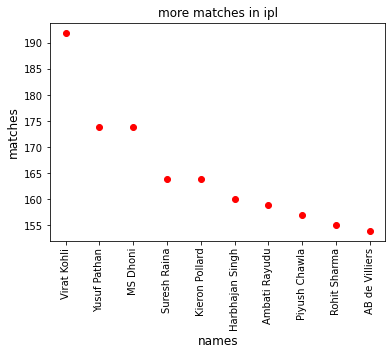

In [78]:
#plt.figure(figsize=[15,8])
plt.scatter(ipl['names'],ipl['matches'],color='r')
plt.xlabel('names',fontsize='large')
plt.ylabel('matches',fontsize='large')
plt.xticks(rotation = 90)
plt.title('more matches in ipl')
plt.show

### 2.In All IPL Seasons Which Batsmen Scored More Runs In Single Season?

In [79]:
high_runs1= df_ipl2.groupby(['names'],as_index = False)['runs'].max()
high_runs1=high_runs1.sort_values('runs',ascending=False)[:10]
high_runs1

,names,runs
601,Virat Kohli,973
150,David Warner,848
269,Kane Williamson,735
339,Michael Hussey,733
126,Chris Gayle,733
0,AB de Villiers,687
456,Rishabh Pant,684
261,KL Rahul,670
462,Robin Uthappa,660
518,Shikhar Dhawan,618


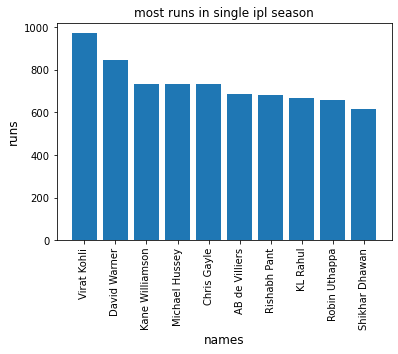

In [80]:

plt.bar(high_runs1['names'],high_runs1['runs'])
plt.xlabel('names',fontsize='large')
plt.ylabel('runs',fontsize='large')
plt.xticks(rotation=90)
plt.title('most runs in single ipl season')
plt.show();

##### 3.Who Have The Best Average Among All Ipl Seasons?

In [81]:
ipl2=df_ipl2.groupby(['names'])['avg'].mean()
ipl2=ipl2.sort_values(ascending=False)[:10]
ipl2

names
Simon Katich       56.055000
Ruturaj Gaikwad    51.000000
Luke Pomersbach    51.000000
JP  Duminy         50.915000
Andrew  Symonds    48.903333
MS Dhoni           47.208182
Matthew Hayden     45.540000
Tom Curran         45.330000
Adam Voges         45.250000
David Warner       43.963000
Name: avg, dtype: float64

In [82]:
ipl2=pd.DataFrame(ipl2)

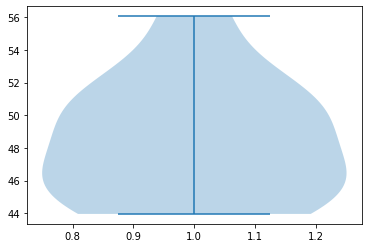

In [83]:
plt.violinplot(ipl2.avg);

#### 4.Who Scored More Runs In Ipl?

In [85]:
 df_ipl2.groupby(['names'],as_index = False)['runs'].sum()

,names,runs
0,AB de Villiers,4384
1,Aakash Chopra,53
2,Aaron Finch,1148
3,Aaron Finch,857
4,Abdul Samad,111
...,...,...
618,Yusuf Pathan,3204
619,Yuvraj Singh,581
620,Yuvraj Singh,2169
621,Yuzvendra Chahal,22


## BI-VARIENT

In [86]:
high_runs = df_ipl2.groupby(['names'],as_index = False)['runs'].sum()
high_runs = high_runs.sort_values('runs',ascending=False)[:20]
high_runs

,names,runs
601,Virat Kohli,5878
150,David Warner,5091
126,Chris Gayle,4772
557,Suresh Raina,4527
0,AB de Villiers,4384
518,Shikhar Dhawan,4268
467,Rohit Sharma,4060
307,MS Dhoni,4058
188,Gautam Gambhir,3931
507,Shane Watson,3874


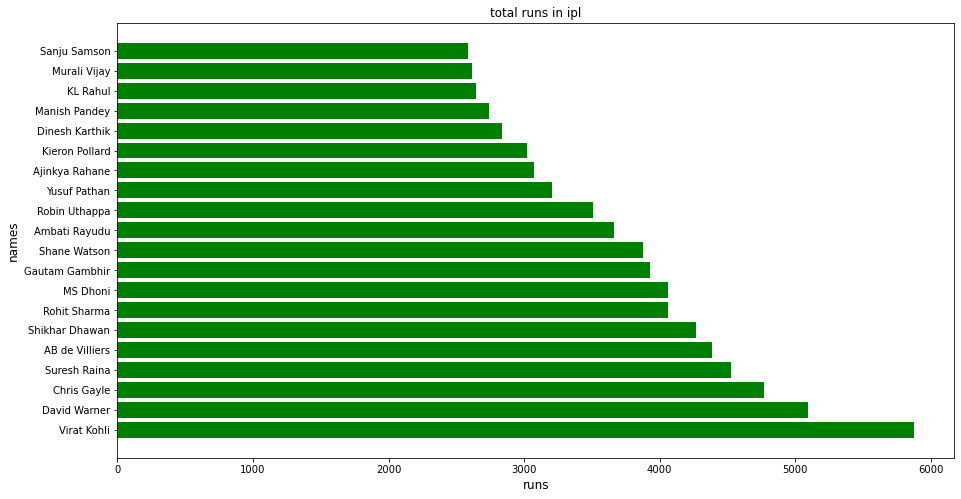

In [87]:
plt.figure(figsize=[15,8])
plt.barh(high_runs['names'],high_runs['runs'],color = 'g')
plt.xlabel('runs',fontsize='large')
plt.ylabel('names',fontsize='large')
plt.title('total runs in ipl')
plt.show()

In [88]:
df_ipl2.groupby(['names'])['runs'].sum().sort_values(ascending=False)[:10]


names
Virat Kohli       5878
David Warner      5091
Chris Gayle       4772
Suresh Raina      4527
AB de Villiers    4384
Shikhar Dhawan    4268
Rohit Sharma      4060
MS Dhoni          4058
Gautam Gambhir    3931
Shane Watson      3874
Name: runs, dtype: int64

5.Who Hit More Sixes in IPL?

In [89]:
 most_sixes = df_ipl2.groupby(['names'],as_index=False)['sixes'].sum().sort_values(by = 'sixes',ascending = False).iloc[0:10]

In [90]:
most_sixes

,names,sixes
126,Chris Gayle,349
0,AB de Villiers,223
601,Virat Kohli,201
283,Kieron Pollard,198
150,David Warner,190
507,Shane Watson,190
307,MS Dhoni,186
557,Suresh Raina,171
467,Rohit Sharma,162
618,Yusuf Pathan,158


In [91]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## line plot

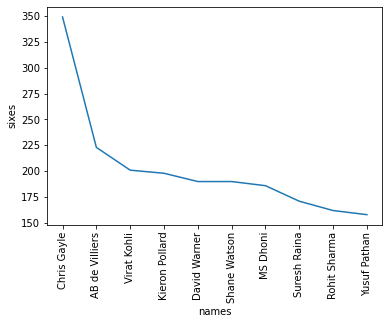

In [92]:
sns.lineplot(most_sixes.names,most_sixes.sixes)
plt.xticks(rotation = 90);

### 6.who have the more fiftys in ipl? 

In [93]:
df_fiftys=df_ipl2.groupby(['names'])['fiftys'].sum().sort_values(ascending=False)[:10]


In [94]:
df_fif=pd.DataFrame(df_fiftys)
df_fif = df_fif.reset_index()
df_fif

,names,fiftys
0,David Warner,47
1,Virat Kohli,39
2,AB de Villiers,35
3,Gautam Gambhir,35
4,Shikhar Dhawan,34
5,Suresh Raina,32
6,Chris Gayle,31
7,Rohit Sharma,31
8,KL Rahul,21
9,Shane Watson,21


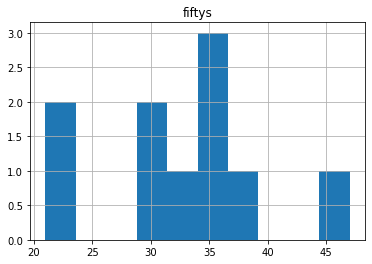

In [95]:
df_fif.hist(bins=10);

In [96]:
df_ipl2.groupby(['names'])['strike_rate'].mean().sort_values(ascending=False).nlargest(10)


names
Bhargav Bhatt           300.00
Abu Nechim              300.00
Billy Stanlake          250.00
Scott Styris            250.00
Raiphi  Gomez           246.00
Deepak  Chahar          233.33
Harmeet Singh Bansal    214.28
Umar Gul                205.26
Syed Mohammad           200.64
Reetinder Sodhi         200.00
Name: strike_rate, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

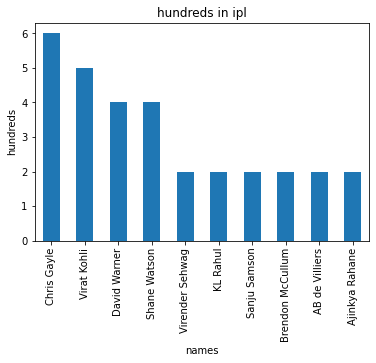

In [97]:
df_ipl2.groupby(['names'])['hundreds'].sum().sort_values(ascending=False).nlargest(10).plot(kind='bar')
plt.title('hundreds in ipl')
plt.ylabel('hundreds')
plt.show

In [98]:
import numpy as np

In [99]:
df=df_ipl2.groupby(['names']).sum()[df_ipl2.groupby(['names']).sum()['innings']>120][df_ipl2.groupby(['names']).sum()[df_ipl2.groupby(['names']).sum()['innings']>120]['runs']>3000]['strike_rate'].sort_values(ascending=False).nlargest(20)/13


In [100]:
df

names
AB de Villiers    135.874615
Chris Gayle       134.090769
Virat Kohli       127.904615
Yusuf Pathan      127.510000
Kieron Pollard    126.603846
Shane Watson      124.953077
MS Dhoni          116.897692
Shikhar Dhawan    110.104615
David Warner      109.625385
Ambati Rayudu     106.360769
Suresh Raina      105.389231
Robin Uthappa     102.065385
Rohit Sharma      100.106923
Gautam Gambhir     94.471538
Name: strike_rate, dtype: float64

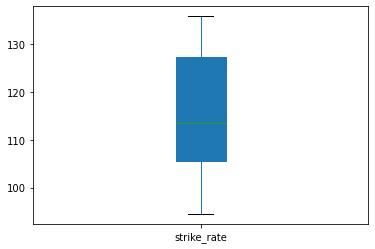

In [101]:
df.plot(kind='box',patch_artist='True');

In [102]:
ipl_sr=df_ipl2.groupby(['names']).mean()[df_ipl2.groupby(['names']).mean()['runs']>300]['strike_rate'].sort_values(ascending=False).nlargest(20)

In [103]:
sr=pd.DataFrame(ipl_sr)
sr = sr.reset_index()
sr

,names,strike_rate
0,Virender Sehwag,153.517143
1,Rishabh Pant,149.216000
2,Jos Buttler,148.736000
3,Adam Gilchrist,148.536667
4,AB de Villiers,147.197500
5,Rahul Tripathi,146.440000
6,Chris Gayle,145.265000
7,Aaron Finch,144.416667
8,Ben Stokes,142.980000
9,David Warner,142.513000


## catplot

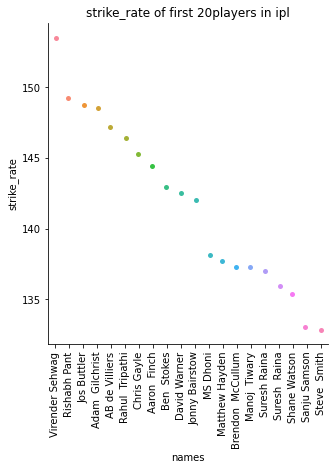

In [104]:
sns.catplot(x='names',y='strike_rate',data=sr)
plt.xticks(rotation=90)
plt.title('strike_rate of first 20players in ipl',fontsize='large');

In [129]:
rb=df_ipl2.groupby(['names','runs'])['sixes'].sum().sort_values(ascending=False)[:10]
rb=pd.DataFrame(rb)
rb=rbs.reset_index()
rb

,index,names,runs,sixes
0,0,Chris Gayle,733,59
1,1,Andre Russell,510,52
2,2,Chris Gayle,708,51
3,3,Chris Gayle,608,44
4,4,Virat Kohli,973,38
5,5,Chris Gayle,491,38
6,6,Rishabh Pant,684,37
7,7,AB de Villiers,687,37
8,8,Glenn Maxwell,552,36
9,9,Shane Watson,555,35


In [127]:
rb=df_ipl2.groupby(['runs'])['balls'].sum().sort_values(ascending=False)[:10]
rbs=pd.DataFrame(rb)
rbs=rbs.reset_index()
rbs

,runs,balls
0,196,1324
1,332,1319
2,357,1283
3,405,1281
4,311,1250
5,324,1249
6,396,1247
7,424,1213
8,255,1194
9,371,1143


## HEAT MAP

<AxesSubplot:>

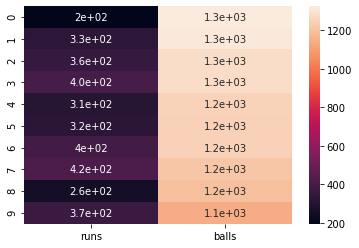

In [107]:
sns.heatmap(rbs,annot=True)


In [122]:
value = int(input('enter value :'))
df_ipl2.groupby(['names'])['runs'].sum().sort_values(ascending=False)[df_ipl2.groupby(['names'])['runs'].sum().sort_values(ascending=False) < value]

enter value :3000


names
Dinesh Karthik        2839
Manish Pandey         2743
KL Rahul              2647
Murali Vijay          2619
Sanju Samson          2584
                      ... 
Daniel Sams              0
Sheldon Cottrell         0
Ajantha Mendis           0
Sandeep Lamichhane       0
Khaleel Ahmed            0
Name: runs, Length: 608, dtype: int64

## Violin plot

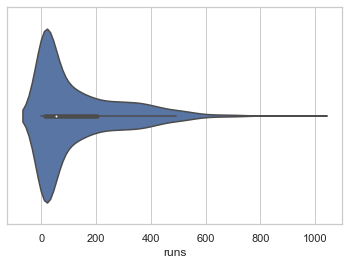

In [124]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.violinplot(x=df_ipl2["runs"]);

# In Single Season How Many Batsmen Got Fiftys?



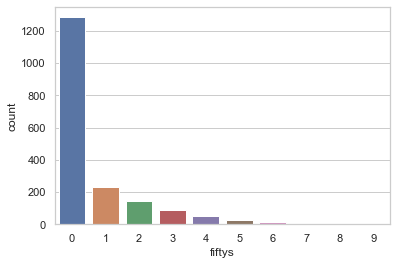

In [110]:
sns.countplot(x=df_ipl2['fiftys']);

In [111]:
df_ipl2

,names,matches,innings,notouts,runs,balls,high_score,avg,strike_rate,fours,sixes,fiftys,hundreds,season
0,Shaun Marsh,11,11,2,616,441,115,68.44,139.68,59,26,5,1,2008
1,Gautam Gambhir,14,14,1,534,379,86,41.07,140.89,68,8,5,0,2008
2,Sanath Jayasuriya,14,14,2,518,309,114,43.16,167.63,58,31,2,1,2008
3,Shane Watson,15,15,5,472,311,76,47.20,151.76,47,19,4,0,2008
4,Graeme Smith,11,11,2,441,362,91,49.00,121.82,54,8,3,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,Khaleel Ahmed,7,1,0,0,2,0,0.00,0.00,0,0,0,0,2020
1833,Arshdeep Singh,8,1,0,0,3,0,0.00,0.00,0,0,0,0,2020
1834,Daniel Sams,3,1,0,0,2,0,0.00,0.00,0,0,0,0,2020
1835,Shreevats Goswami,2,2,0,0,4,0,0.00,0.00,0,0,0,0,2020


### MOSTS NOTOUTS IN IPL

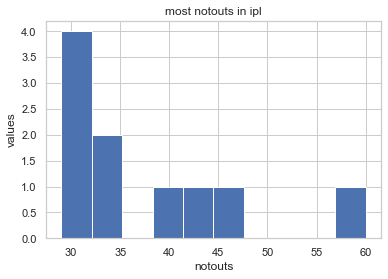

In [112]:
df_ipl2.groupby(['names'])['notouts'].sum().sort_values(ascending=False)[:10].plot(kind='hist'); 
plt.xlabel('notouts')
plt.ylabel('values') 
plt.title('most notouts in ipl') 
plt.show();

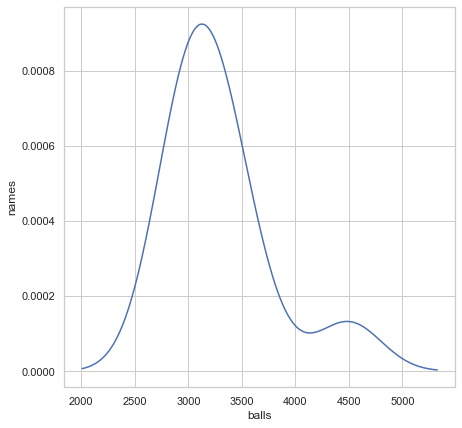

In [113]:
plt.figure(figsize=(7,7))
df_ipl2.groupby(['names'])['balls'].sum().sort_values(ascending=False)[:10].plot(kind='kde');
plt.xlabel('balls')
plt.ylabel('names')
plt.show();


## PIE CHART

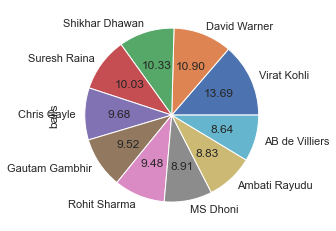

In [114]:
df_ipl2.groupby(['names'])['balls'].sum().sort_values(ascending=False)[:10].plot(kind='pie',autopct=("%.2f"))
plt.show()

In [115]:
rbs

,runs,balls
0,196,1324
1,332,1319
2,357,1283
3,405,1281
4,311,1250
5,324,1249
6,396,1247
7,424,1213
8,255,1194
9,371,1143


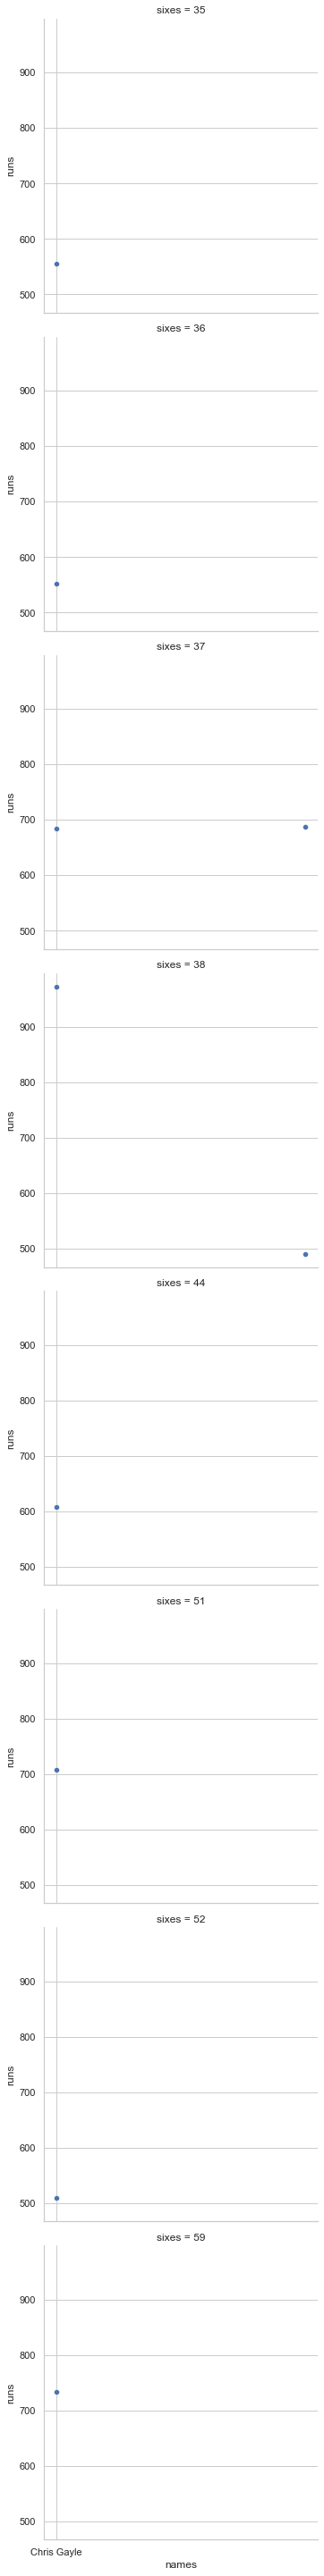

In [131]:
sns.relplot(x='names',y='runs',data=rbs,row=rb.sixes);